In [ ]:
### IMPORTS:

import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

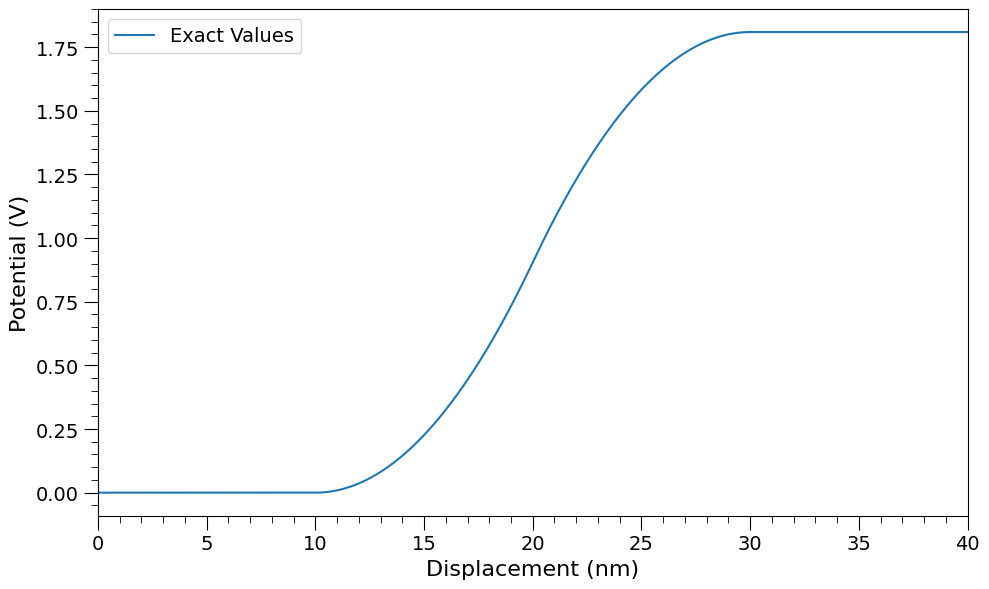

In [ ]:
### EXACT VALUES:

# Define Constants
l = 1e-8
Cn = 1e24
Cp = Cn
Wn = 1e-8
Wp = Wn
e = 1.6022e-19
epsilon0 = 8.8542e-12

x = np.linspace(0, 40e-9, 500) # Defining 500 x values between 0-40nm

# Defining the function for potential
def potential(x: np.ndarray, l: float, Wp: float, Wn: float, Cp: float, Cn: float, e: float, epsilon0: float) -> np.ndarray:
    phi = np.zeros_like(x)
    for i, xi in enumerate(x):
        if xi <= l:
            phi[i] = 0
        elif l < xi <= l + Wp:
            phi[i] = e * Cp * (xi - l) ** 2 / (2 * epsilon0)
        elif l + Wp < xi <= l + Wp + Wn:
            phi[i] = e * Cp * Wp * (2 * (xi - l - Wp) + Wp) / (2 * epsilon0) - e * Cn * (xi - l - Wp) ** 2 / (2 * epsilon0)
        else:
            phi[i] = (e * Cp * Wp ** 2 + e * Cn * Wn ** 2) / (2 * epsilon0)
    return phi

# Compute potential
phi = potential(x, l, Wp, Wn, Cp, Cn, e, epsilon0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x * 1e9, phi)  # Convert x to nm for plotting
plt.tick_params(labelsize=14)
plt.ylabel('Potential (V)', fontsize=16)
plt.xlabel('Displacement (nm)', fontsize=16)
plt.xlim(0, 40)  # Set x-axis limits from 0 to 40 nm
plt.grid(False)
plt.tight_layout()
plt.minorticks_on()
# Make minor ticks longer
plt.tick_params(which='minor', length=5)
plt.tick_params(which='major', length=10)
# Add a legend
plt.legend(['Exact Values'], loc='best', fontsize=14)

plt.tight_layout()
plt.show()


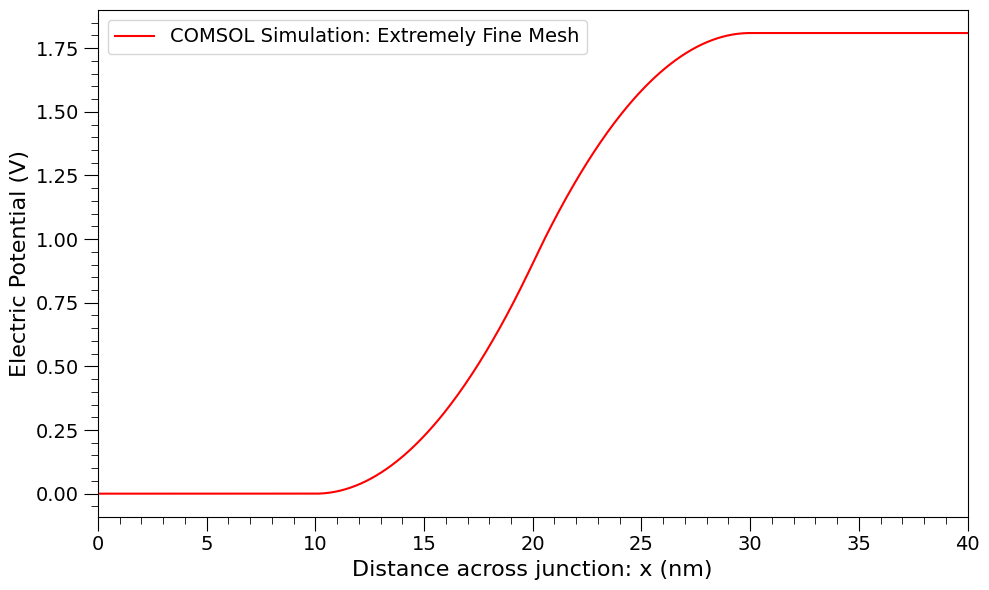

In [ ]:
### PLOTTING COMSOL - EXTREMELY FINE

# Import the data from the text file and split x,y
data = np.loadtxt('COSMOL_exfine.txt')
x = data[:, 0]
y = data[:, 1]

# Plot the data with no gridlines, minor ticks on, and a title
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='COMSOL Simulation: Extremely Fine Mesh', color='r')
plt.xlim(0, 40)
plt.xlabel('Distance across junction: x (nm)', fontsize=16)
plt.ylabel('Electric Potential (V)', fontsize=16)

plt.grid(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.tick_params(axis='both', which='minor', length=5)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.show()

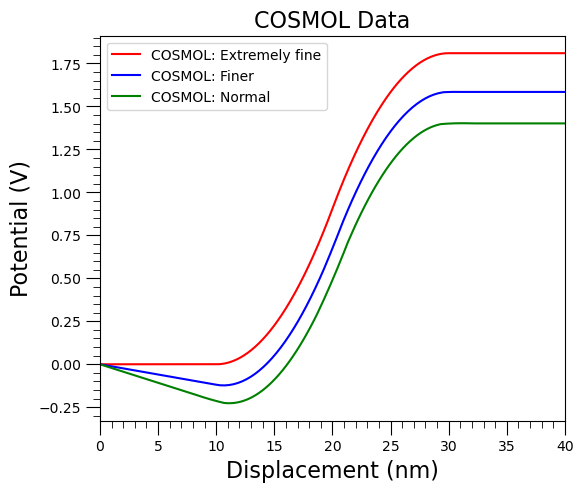

In [ ]:
### COMPARITIVE PLITS

#Import the data from the text file and split
data_exfine = np.loadtxt('COSMOL_exfine.txt') #Extremeley fine
x_exfine = data_exfine[:,0]
y_exfine = data_exfine[:,1]

data_fine = np.loadtxt('COSMOL_fine.txt') #Fine
x_fine = data_fine[:,0]
y_fine = data_fine[:,1]

data_norm = np.loadtxt('COSMOL_norm.txt') #Normal
x_norm = data_norm[:,0]
y_norm = data_norm[:,1]

#Plot the data 
plt.figure(figsize=(6, 5))
plt.plot(x_exfine, y_exfine, label='COSMOL: Extremely fine', color='r')
plt.plot(x_fine, y_fine, label='COSMOL: Finer', color='b')
plt.plot(x_norm, y_norm, label='COSMOL: Normal', color='g')

plt.xlim(0, 40)

plt.xlabel('Displacement (nm)', fontsize=16)
plt.ylabel('Potential (V)', fontsize=16)
plt.title('COSMOL Data', fontsize=16)

plt.grid(False)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10)
plt.tick_params(axis='both', which='minor', length=5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.legend()
plt.show()

A = 0.017968883658478235
n = 2.003826896819136


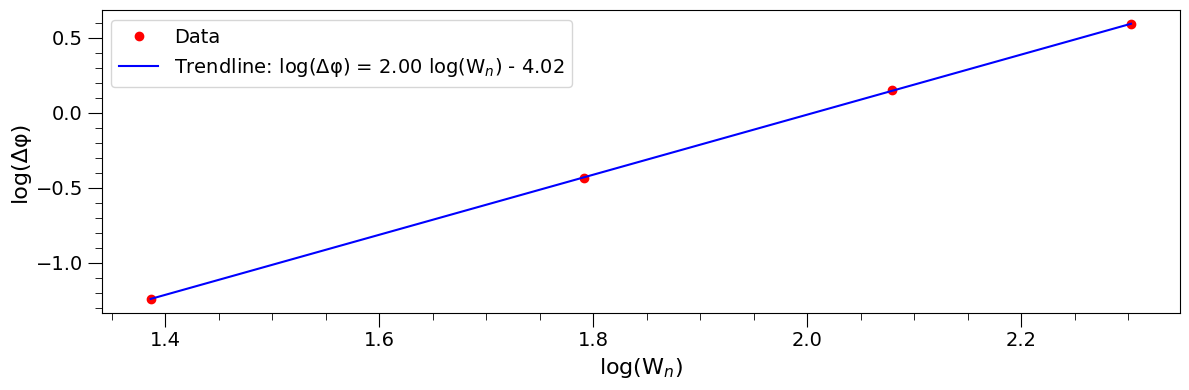

In [ ]:
###PLOTTING POTENTIAL AGAINST DEPLETION WIDTH

# Data from COMSOL
x = np.array([4, 6, 8, 10])
y = np.array([0.2892, 0.6495, 1.1639, 1.8095])

# Defining the power law function
def power_law(x: float, A: float, n:float)-> float: 
    """
    Calculate the power law function.
    The power law function is defined as:
        f(x) = A * x^n

    Parameters:
    x (float or array-like): The input value(s) at which to evaluate the power law.
    A (float): The coefficient of the power law.
    n (float): The exponent of the power law.

    Returns:
    float or array-like: The result of the power law function evaluated at x.
    """
    return A * x ** n

# Take logarithms
logx = np.log(x)
logy = np.log(y)

# Plot log-log plot
plt.figure(figsize=(12, 4))
plt.plot(logx, logy, 'ro', label='Data')
plt.xlabel('log(W$_n$)', fontsize=16)
plt.ylabel('log(Δφ)', fontsize=16)

# Add a trendline and find intercept and slope
slope, intercept = np.polyfit(logx, logy, 1)
plt.plot(logx, slope * logx + intercept, 'b-', label='Trendline: log(Δφ) = %.2f log(W$_n$) - %.2f' % (slope, -intercept))
print('A =', np.exp(intercept))
print('n =', slope)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.tick_params(axis='both', which='minor', length=5)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()

plt.show()

In [38]:
y = 1.2
#solve using the y = 0.01814838439539528*Wn^1.999134308112405
Wn = (y/0.01814838439539528)**(1/1.999134308112405)

print('Wn =', Wn)

Wn = 8.138901135115429
